<a href="https://colab.research.google.com/github/dilusha07/ML_Ionosphere-_Data_Classification/blob/main/GroupC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

01)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!pip install scikit-learn

In [ ]:
import sklearn

In [ ]:
from sklearn import datasets

In [ ]:
#import dataset
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv(
'/content/gdrive/My Drive/dataset.csv')

In [ ]:
#first 5 data points
df.head(5)

,diagnosis,radius_mean,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,2.212902,2.128398,1.841711,0.082382,0.858964,-0.826016,1.157271,1.375915,0.943028,0.847871,...,-1.068834,0.189931,-0.055537,1.062443,0.579647,-0.320222,-0.269756,0.323214,1.374336,-0.204943
1,0.276132,0.162560,-0.435673,0.096421,-1.886851,0.580846,3.287246,0.208879,-0.519715,2.024257,...,-0.430787,-0.130656,-0.971357,-1.718952,-0.706840,-0.636780,0.123011,0.694192,1.055958,0.382461
2,0.317723,-0.293033,0.854137,-0.513025,-0.872562,0.176642,-0.559319,-0.489247,-0.562086,-0.794062,...,-0.818470,0.522515,0.676882,-0.508541,-0.146186,1.351959,1.905433,0.498425,1.868022,-0.062160
3,-0.539934,1.767377,-0.350113,-1.354933,0.428016,0.374755,-0.190795,-1.036393,0.121548,0.954531,...,2.226641,-0.279936,-2.051145,0.122031,0.482489,-1.034198,0.909865,1.220988,-1.565968,0.550540
4,-0.002838,-1.300181,0.042617,-1.193667,0.038868,0.849344,-1.400895,0.943826,0.589136,-0.097222,...,-0.286793,0.328699,-0.422676,-0.045516,-1.710315,-0.546598,-1.056129,-0.719254,-1.515736,-0.467234


02)

In [ ]:
#count the number of missing values
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               2
perimeter_mean             6
area_mean                  7
smoothness_mean            8
compactness_mean           0
concavity_mean             9
concave points_mean        1
symmetry_mean              3
fractal_dimension_mean     4
radius_se                  5
texture_se                 3
perimeter_se               1
area_se                    0
smoothness_se              0
compactness_se             2
concavity_se               1
concave points_se          4
symmetry_se                0
fractal_dimension_se       1
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
#identify columns that have missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             567 non-null    float64
 4   perimeter_mean           563 non-null    float64
 5   area_mean                562 non-null    float64
 6   smoothness_mean          561 non-null    object 
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           560 non-null    float64
 9   concave points_mean      568 non-null    float64
 10  symmetry_mean            566 non-null    float64
 11  fractal_dimension_mean   565 non-null    float64
 12  radius_se                564 non-null    float64
 13  texture_se               566 non-null    object 
 14  perimeter_se             5

03)

In [ ]:
#Impute the missing values by the median value of those column/columns
df['texture_mean']=df['texture_mean'].fillna(df['texture_mean'].median())
df['perimeter_mean']=df['perimeter_mean'].fillna(df['perimeter_mean'].median())
df['area_mean']=df['area_mean'].fillna(df['area_mean'].median())
df['concavity_mean']=df['concavity_mean'].fillna(df['concavity_mean'].median())
df['concave points_mean']=df['concave points_mean'].fillna(df['concave points_mean'].median())
df['symmetry_mean']=df['symmetry_mean'].fillna(df['symmetry_mean'].median())
df['fractal_dimension_mean']=df['fractal_dimension_mean'].fillna(df['fractal_dimension_mean'].median())
df['radius_se']=df['radius_se'].fillna(df['radius_se'].median())
df['perimeter_se']=df['perimeter_se'].fillna(df['perimeter_se'].median())
df['compactness_se']=df['compactness_se'].fillna(df['compactness_se'].median())
df['fractal_dimension_se']=df['fractal_dimension_se'].fillna(df['fractal_dimension_se'].median())

df['concave points_se']=df['concave points_se'].fillna(df['concave points_se'].mode()[0])
df['concavity_se']=df['concavity_se'].fillna(df['concavity_se'].mode()[0])
df['texture_se']=df['texture_se'].fillna(df['texture_se'].mode()[0])
df['smoothness_mean']=df['smoothness_mean'].fillna(df['smoothness_mean'].mode()[0])



In [ ]:
#sum of missing values after replacing by median values
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

04)

In [ ]:
#store data set again
df = pd.read_csv(
'/content/gdrive/My Drive/dataset.csv')

In [ ]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               2
perimeter_mean             6
area_mean                  7
smoothness_mean            8
compactness_mean           0
concavity_mean             9
concave points_mean        1
symmetry_mean              3
fractal_dimension_mean     4
radius_se                  5
texture_se                 3
perimeter_se               1
area_se                    0
smoothness_se              0
compactness_se             2
concavity_se               1
concave points_se          4
symmetry_se                0
fractal_dimension_se       1
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
#discard the data points that contain missing values
df.dropna(axis = 'rows')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.1184,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
2,84300903,M,19.69,21.25,130.00,1203.0,0.1096,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
4,84358402,M,20.29,14.34,135.10,1297.0,0.1003,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.1189,0.16450,0.09366,0.05985,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.2678,0.1556,0.3196,0.11510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,925622,M,15.22,30.62,103.40,716.9,0.1048,0.20870,0.25500,0.09429,...,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.2356,0.4089,0.14090
563,926125,M,20.92,25.09,143.00,1347.0,0.1099,0.22360,0.31740,0.14740,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.1178,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


05)

In [ ]:
#import matplotlib and seaborn to draw boxplot
import matplotlib.pyplot as plt
import seaborn as sns


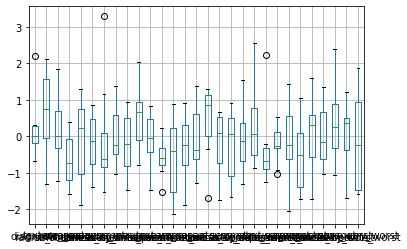

In [ ]:
#draw boxplot using below columns
np.random.seed(123456789)
df = pd.DataFrame(np.random.randn(10, 30),
                  columns=['diagnosis', 'radius_mean', 'texture_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean',
                             'symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se',
                             'concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst',
                             'compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst'])
boxplot = df.boxplot(column=['diagnosis', 'radius_mean', 'texture_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean',
                             'symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se',
                             'concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst',
                             'compactness_worst','concavity_worst','concave points_worst','symmetry_worst'])


High valus - 4 ( grater than 2)
Low values - 2 (less than -2)


07)

In [ ]:
#Check for duplicate instances in the breast cancer dataset
df.duplicated()


0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

08)

In [ ]:
#drop all duplicates
df = df.drop_duplicates()

In [ ]:
#identify number of features for new dataset after dropping duplicates
df.shape

(10, 30)

10)

In [ ]:
#assign number of rows to x variable
x = np.random.normal(size=10)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


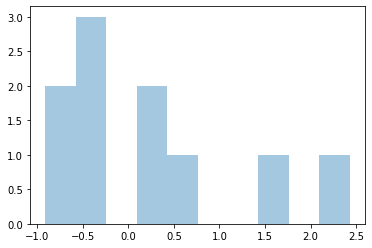

In [ ]:
#draw histogram by passing parameters
sns.distplot(x, kde=False, bins=10)